# COVID-19

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in covid data
covid_data = pd.read_csv("Data_Raw/us-counties.csv")

In [20]:
# review data
covid_data.shape

(61971, 6)

In [25]:
# review data
covid_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [30]:
# review data
covid_data['state'].describe()

count     61971
unique       55
top       Texas
freq       3685
Name: state, dtype: object

In [44]:
# remove Guam, Northern Mariana Islands, and Puerto Rico
data = covid_data.set_index("state")
data = data.drop("Guam", axis=0)
data

,date,county,fips,cases,deaths
state,,,,,
Washington,2020-01-21,Snohomish,53061.0,1,0
Washington,2020-01-22,Snohomish,53061.0,1,0
Washington,2020-01-23,Snohomish,53061.0,1,0
Illinois,2020-01-24,Cook,17031.0,1,0
Washington,2020-01-24,Snohomish,53061.0,1,0
...,...,...,...,...,...
Wyoming,2020-04-15,Sublette,56035.0,1,0
Wyoming,2020-04-15,Sweetwater,56037.0,10,0
Wyoming,2020-04-15,Teton,56039.0,59,0


In [85]:
# create dataframe for total cases and deaths by state
cases = states['cases'].agg(np.max)
cases_by_state = pd.DataFrame(data=cases)

deaths = states['deaths'].agg(np.max)
deaths_by_state = pd.DataFrame(data=deaths)

by_state = pd.merge(cases_by_state, deaths_by_state, on=['state'])
by_state = by_state.reset_index()
by_state = by_state.rename(columns={'state': 'STATE_NAME'})
by_state


,STATE_NAME,cases,deaths
0,Alabama,628,19
1,Alaska,139,4
2,Arizona,2146,60
3,Arkansas,353,10
4,California,10496,402
5,Colorado,1468,61
6,Connecticut,6480,365
7,Delaware,974,21
8,District of Columbia,2197,72
9,Florida,8066,155


In [92]:
#import modules for map
import geopandas as gpd
import shapefile as shp

# read in .shp file for US map
usa_map = gpd.read_file('miscellaneous\states_21basic\states.shp')
usa_map = usa.sort_values(by="STATE_NAME")
usa_map

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
42,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
50,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
36,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
46,Arkansas,47,05,West South Central,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
24,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
31,Colorado,32,08,Mountain,CO,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
18,Connecticut,19,09,New England,CT,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
28,Delaware,29,10,South Atlantic,DE,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
27,District of Columbia,28,11,South Atlantic,DC,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
48,Florida,49,12,South Atlantic,FL,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."


In [99]:
# merge map and Covid dataframes
covid_map = pd.merge(usa_map,by_state, on=['STATE_NAME'])
covid_map

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,cases,deaths
0,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",628,19
1,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",139,4
2,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",2146,60
3,Arkansas,47,05,West South Central,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",353,10
4,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",10496,402
5,Colorado,32,08,Mountain,CO,"POLYGON ((-102.04446 37.64147, -102.04201 37.3...",1468,61
6,Connecticut,19,09,New England,CT,"POLYGON ((-73.53039 41.52275, -73.51715 41.665...",6480,365
7,Delaware,29,10,South Atlantic,DE,"POLYGON ((-75.70707 38.55759, -75.71071 38.649...",974,21
8,District of Columbia,28,11,South Atlantic,DC,"POLYGON ((-77.00793 38.96667, -76.91090 38.890...",2197,72
9,Florida,49,12,South Atlantic,FL,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ...",8066,155


Text(0.5, 485.1600000000002, 'Number of Deaths by State')

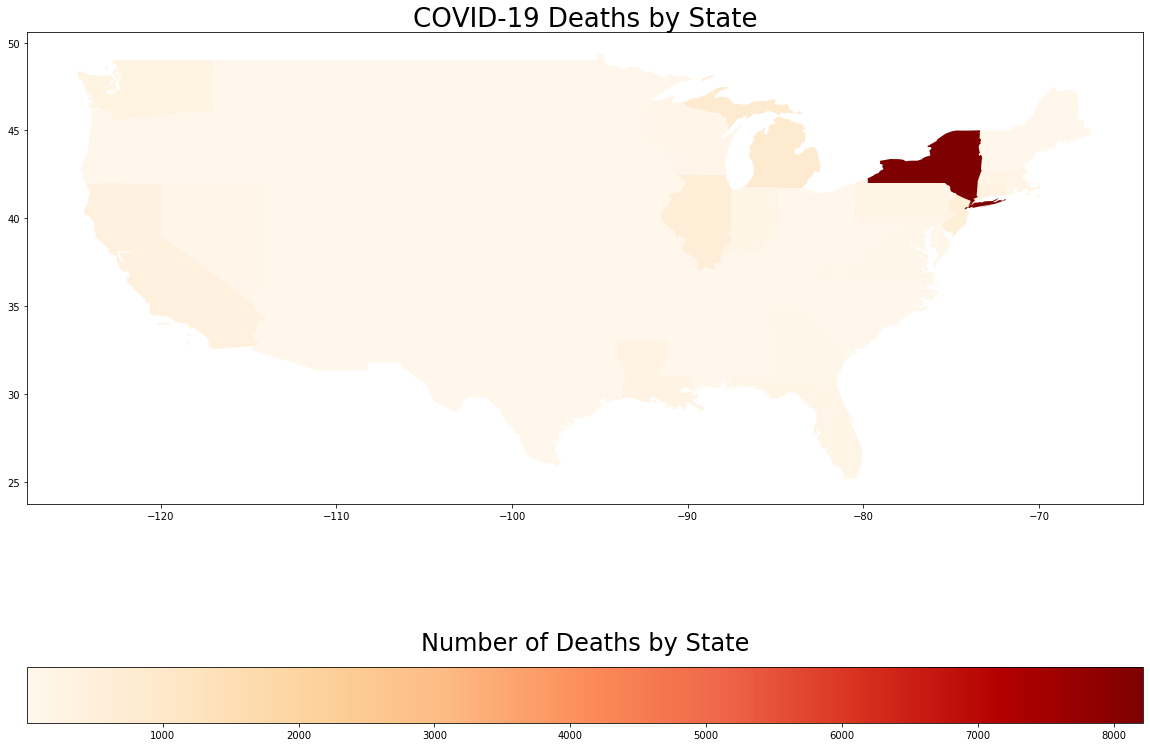

In [98]:
# create choropleth map for Covid-19 deaths

# remove Alaska and Hawaii
covid_map = covid_map [covid_map.STATE_ABBR != 'HI']
covid_map = covid_map [covid_map.STATE_ABBR != 'AK']

fig,ax=plt.subplots(figsize=(20,20))
ax = covid_map.plot(column='deaths',
             cmap='OrRd',
             ax=ax,
             legend=True,
             legend_kwds={'orientation':'horizontal'})
ax.set_title('COVID-19 Deaths by State', fontsize=26)
ax.set_xlabel("Number of Deaths by State",fontsize=24,  labelpad=110)